## Descision Tree Classifier With Supervised Learning

### What is Supervised Learning:
An important concept in machine learning is supervised learning, which involves training algorithms using labeled data to discover a mapping between inputs and intended outputs. As a result, the algorithm can forecast for fresh, untested data.
### What is Decision Tree Classifier:
A decision tree is a supervised machine learning algorithm that is a flowchart-like tree structure where it predicts the value of a target variable by learning simple decision rules inferred from the data features(or attributes). The internal node represents a feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome.

The topmost node in a decision tree is known as the root node. It learns to partition on the basis of the attribute value.
Read more:

1.https://scikit-learn.org/stable/modules/tree.html

2.https://www.datacamp.com/tutorial/decision-tree-classification-python

### Importing Needed Libraries
Here every library used in the process will be called here, we know it might have been better to keep each library in the needed section, but all libraries here are known for what is their purpose.



In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import PIL
import cv2
import os
import pathlib
import shutil
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model
from sklearn.decomposition import PCA
import random
from sklearn.preprocessing import LabelEncoder

#### Helper Function
This function is used in case we want to delete a certain directory, it has no relation to the model but to the dataset.

In [ ]:
def delete_folder(folder_name):
  directory_to_delete="/content/data_256_" + folder_name
  try:
    shutil.rmtree(directory_to_delete)

  except Exception as e:
    print(e)

### Upload the dataset into the notebook
The data will be uploaded using the interface because it is an easier process.

### Check the count for the uploaded data

In [ ]:
!unzip data_256.zip

Streaming output truncated to the last 5000 lines.
 extracting: data_256/art_gallery/00000001.jpg  
 extracting: data_256/art_gallery/00000002.jpg  
 extracting: data_256/art_gallery/00000003.jpg  
 extracting: data_256/art_gallery/00000004.jpg  
 extracting: data_256/art_gallery/00000005.jpg  
 extracting: data_256/art_gallery/00000006.jpg  
 extracting: data_256/art_gallery/00000007.jpg  
 extracting: data_256/art_gallery/00000008.jpg  
 extracting: data_256/art_gallery/00000009.jpg  
 extracting: data_256/art_gallery/00000010.jpg  
 extracting: data_256/art_gallery/00000011.jpg  
 extracting: data_256/art_gallery/00000012.jpg  
 extracting: data_256/art_gallery/00000013.jpg  
 extracting: data_256/art_gallery/00000014.jpg  
 extracting: data_256/art_gallery/00000015.jpg  
 extracting: data_256/art_gallery/00000016.jpg  
 extracting: data_256/art_gallery/00000017.jpg  
 extracting: data_256/art_gallery/00000018.jpg  
 extracting: data_256/art_gallery/00000019.jpg  
 extracting: data_

In [ ]:
data_dir = pathlib.Path('/content/data_256')

# Ensure that the path exists
if data_dir.exists():
    # Use glob to count all jpg files in the directory and its subdirectories
    image_count = len(list(data_dir.rglob('*.jpg')))
    print(f"Number of images: {image_count}")
else:
    print("Directory does not exist.")

Number of images: 5000


### Display an image from the data

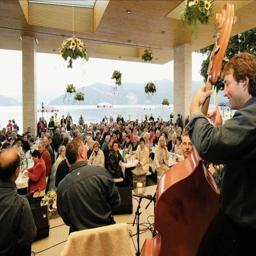

In [ ]:
pics= list(data_dir.glob('banquet_hall/*'))
PIL.Image.open(str(pics[0]))

## Training
This section contains the training and the preprocessing we did for our dataset.

We have tried three approaches for preprocessing:
### First approach: Resize, Flatten, Grayscale, and Normalize the dataset individually


#### Resize

In [ ]:
# Base directory containing the folders of images
base_input_directory = '/content/data_256'
base_output_directory = './content/data_256_resize'

# Ensure the base output directory exists
if not os.path.exists(base_output_directory):
  os.makedirs(base_output_directory)

# Loop through each subfolder in the base input directory
for folder in os.listdir(base_input_directory):
  input_folder = os.path.join(base_input_directory, folder)
  output_folder = os.path.join(base_output_directory, folder)

  # Create an output subfolder if it doesn't exist
  if not os.path.exists(output_folder):
      os.makedirs(output_folder)

  # Process each image in the folder
  for filename in os.listdir(input_folder):
      if filename.lower().endswith(('.png', '.jpg', '.jpeg')):  # Check for image files
          # Read the image
          img = cv2.imread(os.path.join(input_folder, filename))

          # Resize the image
          resized = cv2.resize(img, (256, 256))

          # Save the resized image to the corresponding output subfolder
          cv2.imwrite(os.path.join(output_folder, filename), resized)

print('All image has been resized.')


All image has been resized.


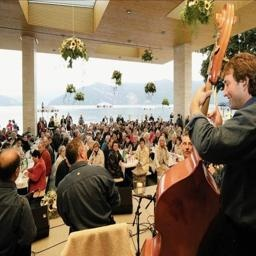

In [ ]:
data_dir = pathlib.Path('./content/data_256_resize')
pics= list(data_dir.glob('banquet_hall/*'))
PIL.Image.open(str(pics[0]))

### Grayscale

In [ ]:
# Base directory containing the folders of images
base_input_directory = './content/data_256_resize' # if you want to first resize the images, imput './data_256_resize'
base_output_directory = './content/data_256_grayscale'

# Ensure the base output directory exists
if not os.path.exists(base_output_directory):
  os.makedirs(base_output_directory)

# Loop through each subfolder in the base input directory
for folder in os.listdir(base_input_directory):
  input_folder = os.path.join(base_input_directory, folder)
  output_folder = os.path.join(base_output_directory, folder)

  # Create an output subfolder if it doesn't exist
  if not os.path.exists(output_folder):
      os.makedirs(output_folder)

  # Process each image in the folder
  for filename in os.listdir(input_folder):
      if filename.lower().endswith(('.png', '.jpg', '.jpeg')):  # Check for image files
          # Read the image
          img = cv2.imread(os.path.join(input_folder, filename))


          # Grayscale the image
          grayscaled = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

          # Save the resized image to the corresponding output subfolder
          cv2.imwrite(os.path.join(output_folder, filename), grayscaled)

print('All images have been grayscaled.')




All images have been grayscaled.


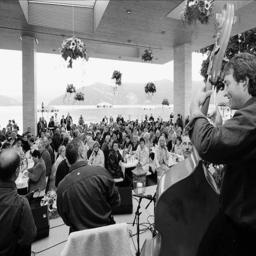

In [ ]:
data_dir = pathlib.Path('./content/data_256_grayscale')
pics= list(data_dir.glob('banquet_hall/*'))
PIL.Image.open(str(pics[0]))

### Flatten

In [ ]:
def load_images_and_labels(base_directory):
    images = []
    labels = []
    label_names = os.listdir(base_directory)

    # Loop over each label
    for label in label_names:
        folder_path = os.path.join(base_directory, label)
        if os.path.isdir(folder_path):
            # Loop over each image file
            for filename in os.listdir(folder_path):
                file_path = os.path.join(folder_path, filename)
                if filename.lower().endswith('.jpg'):
                    # Read the image
                    img = cv2.imread(file_path)

                    # Flatten the image and append to the list
                    images.append(img.flatten())
                    labels.append(label)

    return np.array(images), np.array(labels), label_names

# Path to the dataset
dataset_path = './content/data_256_grayscale'
images, labels, label_names = load_images_and_labels(dataset_path)

### Normalization
we use axis so we don't load all the dataset in the memory at once, but we add more time to the process as a tradeoff.

In [ ]:
X=preprocessing.normalize(images, axis=1)

### Split the dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=0)

### Results for the first approach from the Training/Validation sets

In [ ]:
depth = 10
criterion = "entropy"
min_samples_split = 50

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cnt = 1

for train_index, test_index in kf.split(X_train, y_train):
    clf = DecisionTreeClassifier(max_depth=depth, criterion=criterion, min_samples_split=min_samples_split)

    print(f'Fold: {cnt}, Train set: {len(train_index)}, Val set: {len(test_index)}')
    print(f'Depth: {depth}, Minimum Samples Split: {min_samples_split}')

    # Perform cross-validation using cross_val_score
    scores = cross_val_score(clf, X_train, y_train, cv=kf, scoring="accuracy")  # Use accuracy as the scoring metric (replace with your desired metric)
    print(f'Scores for each fold: {scores}')

    # Adjust parameters in a controlled manner
    depth = max(1, depth + random.randint(2, 10))  # Ensure depth is always positive
    min_samples_split = max(2, min_samples_split + random.randint(2, 5))  # Ensure min_samples_split is at least 2
    print("------------------------------------------------------------------")
    cnt += 1

### Analysis For Approach One
The cost for both training and validate took a lot of both time and computational power, and since we are using the free colab we couldn't access TPU all day long which made it harder to record the runs and results.





## Second Approach:  Dimensionality Reduction

In [ ]:
# Set the number of components for PCA
n_components = 100  # Adjust this number based on the variance you want to retain

# Initialize PCA
pca = PCA(n_components=n_components)
X_reduced = pca.fit_transform(X)

### Split dataset

In [ ]:
print(len(X_reduced))
print(len(labels))

5000
5000


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, labels, test_size=0.2, random_state=0)
print(len(X_train))

4000


## Training The Second Approach

we are going to train our model with train and validation split using kfold cross validation approach

In [ ]:
# Initial Parameters
depth = 15
criterion = "gini"
min_samples_split = 70

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cnt = 1

# Split method generates indices to split data into training and test set.
for train_index, test_index in kf.split(X_train, y_train):
    clf = DecisionTreeClassifier(max_depth=depth, criterion=criterion, min_samples_split=min_samples_split)

    print(f'Fold: {cnt}, Train set: {len(train_index)}, Val set: {len(test_index)}')
    print(f'Depth: {depth}, Minimum Samples Split: {min_samples_split}')

    # Using parallel processing for cross_val_score
    scores = cross_val_score(clf, X_train, y_train, cv=kf, n_jobs=-1)
    print(f'Score: {np.mean(scores)}')

    # Adjust parameters in a controlled manner
    depth = max(1, depth + random.randint(2, 10))  # Ensure depth is always positive
    min_samples_split = max(2, min_samples_split + random.randint(2, 5))  # Ensure min_samples_split is at least 2
    print("------------------------------------------------------------------")
    cnt += 1

### Results For The Second Approach
#### Run1:
#### Initial Parameters for first run
depth = 5,                                                                       criterion = "entropy",                                                        min_samples_split = 10

depth = max(1, depth + random.randint(-1, 1))  # Ensure depth is always positive                                                 
min_samples_split = max(2, min_samples_split + random.randint(0, 2)   
                                                         
Fold: 1, Train set: 3200, Val set: 800                              
Depth: 5, Minimum Samples Split:10                                                                     
Score: 0.31

Fold: 2, Train set: 3200, Val set: 800
Depth: 5, Minimum Samples Split: 12
Score: 0.31

Fold: 3, Train set: 3200, Val set: 800
Depth: 6, Minimum Samples Split: 12
Score: 0.30125

Fold: 4, Train set: 3200, Val set: 800
Depth: 6, Minimum Samples Split: 14
Score: 0.301

Fold: 5, Train set: 3200, Val set: 800
Depth: 5, Minimum Samples Split: 15
Score: 0.31


#### run 2:
#### Initial Parameters For the second run
depth = 10,                                                                      criterion = "entropy" ,                                             min_samples_split = 50                                 
depth = max(1, depth + random.randint(2, 10))  # Ensure depth is always positive                                                 
min_samples_split = max(2, min_samples_split + random.randint(2, 5))
                                                            
Fold: 1, Train set: 3200, Val set: 800
Depth: 10, Minimum Samples Split: 50    
Score: 0.29725

Fold: 2, Train set: 3200, Val set: 800
Depth: 15, Minimum Samples Split: 54
Score: 0.2925

Fold: 3, Train set: 3200, Val set: 800
Depth: 20, Minimum Samples Split: 59
Score: 0.298

Fold: 4, Train set: 3200, Val set: 800
Depth: 30, Minimum Samples Split: 61
Score: 0.301

Fold: 5, Train set: 3200, Val set: 800
Depth: 40, Minimum Samples Split: 64
Score: 0.30375


#### run 3:
depth = 15,                                                            criterion = "gini",                                                              min_samples_split = 70                                                    Depth: 10, Minimum Samples Split: 50
depth = max(1, depth + random.randint(2, 10))  # Ensure depth is always positive                                                 
min_samples_split = max(2, min_samples_split + random.randint(2, 5))

Fold: 1, Train set: 3200, Val set: 800                                     Depth: 15, Minimum Samples Split: 70                                      Score: 0.30725

Fold: 2, Train set: 3200, Val set: 800
Depth: 19, Minimum Samples Split: 72
Score: 0.308

Fold: 3, Train set: 3200, Val set: 800
Depth: 28, Minimum Samples Split: 74
Score: 0.3075

Fold: 4, Train set: 3200, Val set: 800
Depth: 35, Minimum Samples Split: 79
Score: 0.30825

Fold: 5, Train set: 3200, Val set: 800
Depth: 38, Minimum Samples Split: 82
Score: 0.30925


### Analysis
After the runs we decided we will change the way we implement our kfold training to see if that can make any difference. Because it can be seen from the previous results no improvements has been made.

In [ ]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Hyperparameter tuning with Grid Search
parameters = {'max_depth': [10, 20, 30, 40, None],
              'min_samples_split': [2, 10, 20, 50],
              'criterion': ['gini', 'entropy']}

clf = DecisionTreeClassifier()
grid_search = GridSearchCV(clf, parameters, cv=kf, n_jobs=-1)
grid_search.fit(X_reduced, labels)
print("Best parameters found: ", grid_search.best_params_)

# Evaluate with cross-validation using the best parameters
best_clf = grid_search.best_estimator_
scores = cross_val_score(best_clf, X_reduced, labels, cv=kf, n_jobs=-1)
print(f'Scores for each fold: {scores}')
print(f'Mean score: {np.mean(scores)}')

Best parameters found:  {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 50}
Scores for each fold: [0.295 0.325 0.317 0.309 0.313]
Mean score: 0.31179999999999997


### Analysis For The Second Approach
Despite this approach was more computable easier and less time consuming, the results what so ever did not change.
Since both of the previous methods have failed, so we are going to more work on our dataset, our next improvment will be features extraction

## Third Approach: Features Extracting
We will first combine all of the previous preprocessing in one go, then we will extrat features from them.

In [ ]:
# Base directory containing the folders of images
base_input_directory = '/content/data_256'
base_output_directory = '/content/data_256_processed'

# Ensure the base output directory exists
if not os.path.exists(base_output_directory):
    os.makedirs(base_output_directory)

def preprocess_images(base_input_directory, base_output_directory):
    images = []
    labels = []
    label_names = os.listdir(base_input_directory)

    # Loop over each label
    for label in label_names:
        folder_path = os.path.join(base_input_directory, label)
        if os.path.isdir(folder_path):
            output_folder = os.path.join(base_output_directory, label)
            if not os.path.exists(output_folder):
                os.makedirs(output_folder)

            # Loop over each image file
            for filename in os.listdir(folder_path):
                if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
                    file_path = os.path.join(folder_path, filename)
                    # Read the image
                    img = cv2.imread(file_path)
                    if img is None:
                        continue

                    # Resize the image
                    resized = cv2.resize(img, (256, 256))

                    # Grayscale the image
                    grayscaled = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)

                    # Flatten the image and append to the list
                    images.append(grayscaled.flatten())
                    labels.append(label)

                    # Save the processed image to the corresponding output subfolder
                    cv2.imwrite(os.path.join(output_folder, filename), grayscaled)

    return np.array(images), np.array(labels), label_names

# Path to the dataset
images, labels, label_names = preprocess_images(base_input_directory, base_output_directory)

# Normalize the images
X = preprocessing.normalize(images, axis=1)

# Apply PCA for dimensionality reduction
n_components = 100  # Adjust this number based on the variance you want to retain
pca = PCA(n_components=n_components)
X_reduced = pca.fit_transform(X)

# Encode the labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(labels)

# Check the result
print(f'Number of images: {len(X_reduced)}')
print(f'Number of labels: {len(y)}')
print(f'Label names: {label_names}')

Number of images: 5000
Number of labels: 5000
Label names: ['library indoor', 'supermarket', 'banquet_hall', 'art_gallery', 'hotel_room']


#### The VGG16 Model
VGG16 is a convolutional neural network (CNN) architecture designed for image recognition and classification tasks. One of its usage is Feature Extraction as VGG16 can be a valuable tool for extracting features from images. These features capture essential characteristics like shapes, textures, and edges, which can be beneficial for various computer vision tasks.

In [ ]:
# Load VGG16 model + higher level layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
model = Model(inputs=base_model.input, outputs=base_model.get_layer('block5_pool').output)

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
def extract_features(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (256, 256))
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    features = model.predict(img)
    return features.flatten()

# Apply feature extraction to the dataset
def load_and_extract_features(base_directory):
    features = []
    labels = []
    label_names = os.listdir(base_directory)

    for label in label_names:
        folder_path = os.path.join(base_directory, label)
        if os.path.isdir(folder_path):
            for filename in os.listdir(folder_path):
                if filename.lower().endswith('.jpg'):
                    file_path = os.path.join(folder_path, filename)
                    features.append(extract_features(file_path))
                    labels.append(label)
    return np.array(features), np.array(labels), label_names

dataset_path = '/content/data_256_processed'
X, y, label_names = load_and_extract_features(dataset_path)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 79ms/step


##### Knowing that feature extracting will add dimensions to our dataset, we will do another dimensionality reduction

In [ ]:
# Apply PCA for another dimensionality reduction
n_components = 100
pca = PCA(n_components=n_components)
X = pca.fit_transform(X)

### Split The Dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(len(X_train))

4000


## Trainig
In this approach we choose to do hyperparameter tuning in a more effcient way makig our model able to find the best hyperparameters using grid search algorithm.

In [ ]:
# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y_train)

# Hyperparameter grid
param_grid = {
    'max_depth': [5, 10, 20, 30, 40, None],
    'min_samples_split': [2, 10, 20, 50, 100],
    'criterion': ['gini', 'entropy']
}

# Initialize Decision Tree classifier
clf = DecisionTreeClassifier()

# Grid search using Stratified KFold for cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), n_jobs=-1)
grid_search.fit(X_train, y_encoded)

print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

Best parameters found:  {'criterion': 'entropy', 'max_depth': 30, 'min_samples_split': 50}
Best cross-validation score:  0.7505


After fining the best hyperparameters, we now begin the final training for our targeted model.

In [ ]:
best_params = {'criterion': 'entropy', 'max_depth': 30, 'min_samples_split': 50}
clf = DecisionTreeClassifier(**best_params)
clf.fit(X_train, y_encoded)

DecisionTreeClassifier(criterion='entropy', max_depth=30, min_samples_split=50)

Now we predict the outcome

In [ ]:
# Make predictions
y_pred = clf.predict(X_test)

In [ ]:
y_test = le.fit_transform(y_test)

## Model Evaluation
Now we evaluate our nodel using the metrics requested.

Accuracy: 0.755
F1-score: 0.7553216513281849


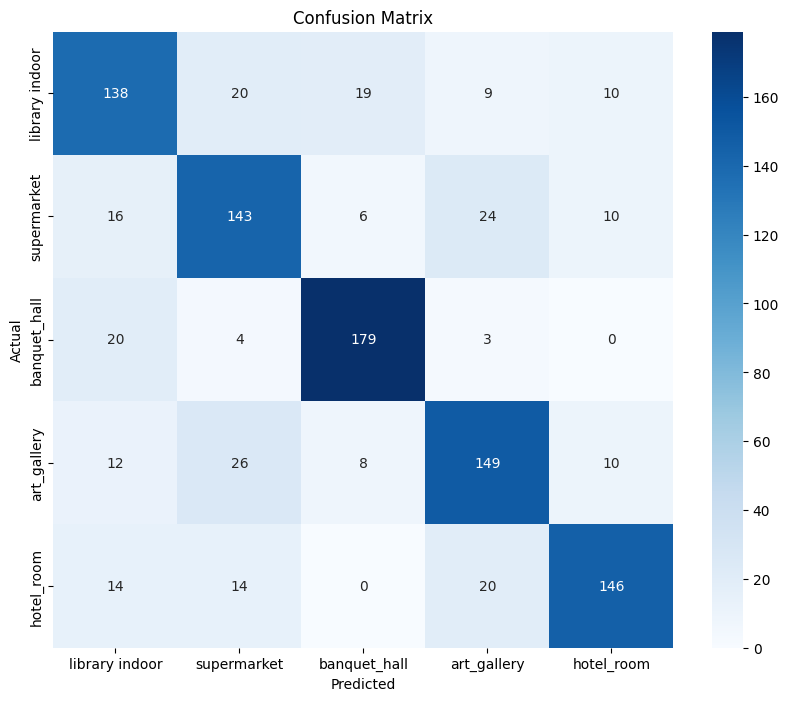

Classification Report:
                precision    recall  f1-score   support

library indoor       0.69      0.70      0.70       196
   supermarket       0.69      0.72      0.70       199
  banquet_hall       0.84      0.87      0.86       206
   art_gallery       0.73      0.73      0.73       205
    hotel_room       0.83      0.75      0.79       194

      accuracy                           0.76      1000
     macro avg       0.76      0.75      0.75      1000
  weighted avg       0.76      0.76      0.76      1000



In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Calculate F1-score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1-score: {f1}')

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_names, yticklabels=label_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Classification report
class_report = classification_report(y_test, y_pred, target_names=label_names)
print('Classification Report:')
print(class_report)

## Results Analysis
Both the first and second turned out to use a less informative dataset, and no matter the preprocessing we did our dataset remained uninformative which led us to the third approach using a CNN network to extract more features from our dataset to help our model to recognize better which worked to increae the accuracy from about ~31% to ~75%.